In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import * 
from sklearn.model_selection import * 
import re
from sklearn.linear_model import Perceptron
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import *
from sklearn.neural_network import * 
from sklearn.svm import *
from sklearn.neighbors import KNeighborsClassifier
sns.set_style('whitegrid')

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
np.unique(y_train,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
def showimg(data,i):
    plt.imshow(data[i].reshape(28,28),interpolation='nearest',cmap=plt.gray())
    plt.show()
    plt.hist(data[i].reshape(784))
    plt.title('pixel value distribution')
    plt.show()

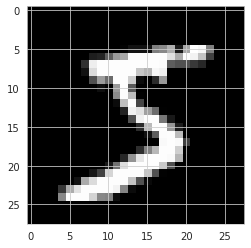

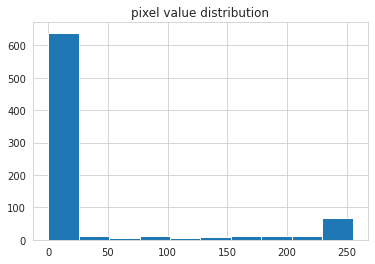

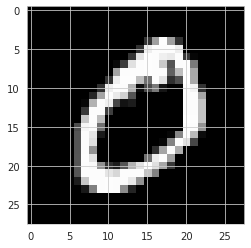

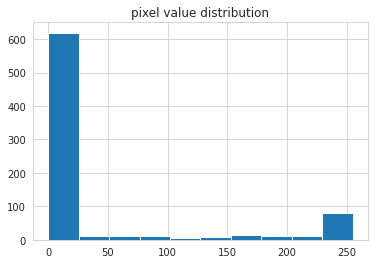

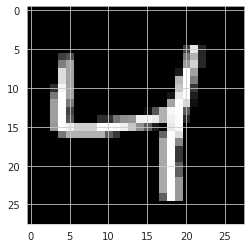

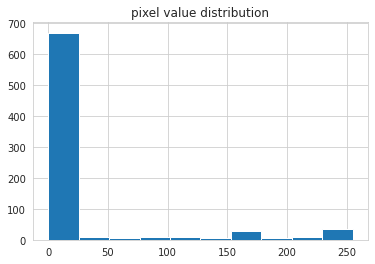

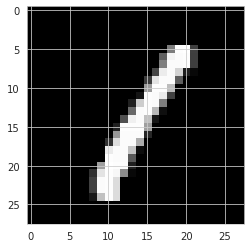

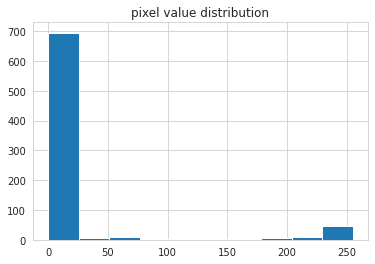

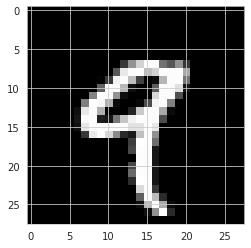

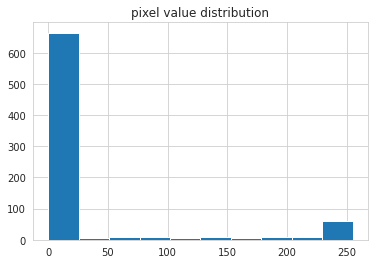

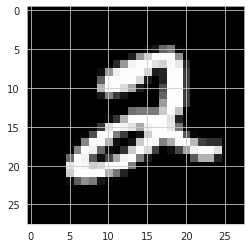

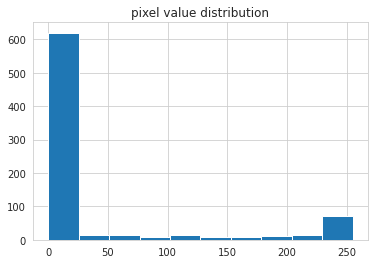

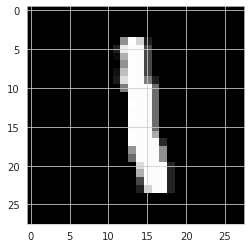

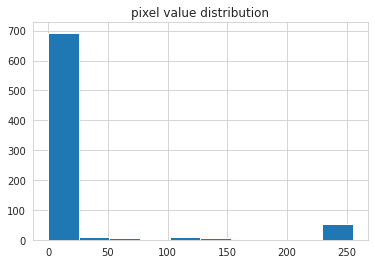

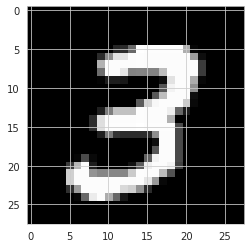

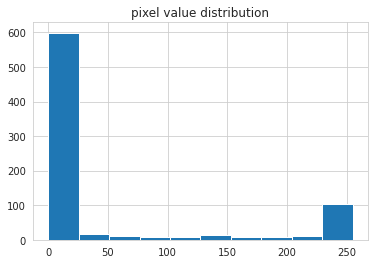

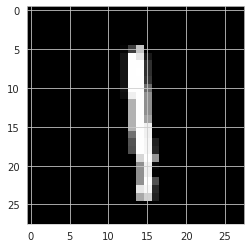

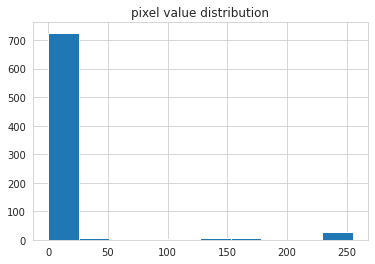

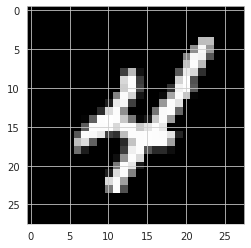

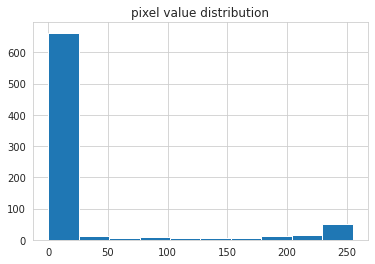

In [ ]:
for i in range(10):
  showimg(x_train,i)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_train.shape

(60000, 784)

In [ ]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
x_test.shape

(10000, 784)

In [ ]:
def give_me_roc_curve(y_test,y_pred):
  label1 = label_binarize(y_test,classes = [0,1,2,3,4])
  label2 = label_binarize(y_pred,classes = [0,1,2,3,4])
  fpr = dict()
  tpr = dict()
  auc_ = dict()
  for i in range(label1.shape[1]):
    fpr[i],tpr[i],_ = roc_curve(label1[:,i],label2[:,i])
    auc_[i] = auc(fpr[i],tpr[i])
  for i in range(label1.shape[1]):
    plt.plot(fpr[i],tpr[i],label = f'auc {auc_[i]}')
    plt.xlabel("fpr")
    plt.ylabel("tpr")
  plt.show()



In [ ]:
df1 = pd.DataFrame(columns = [f'f{i}' for i in range(x_train.shape[1])],data = x_train)
df1['target'] = y_train

df1 = df1.loc[df1.target.isin([i for i in range(5)]) ,:]
x_train = np.array(df1.iloc[:,:-1])
y_train = np.array(df1.iloc[:,-1])
x_train.shape

(30596, 784)

In [ ]:
df2 = pd.DataFrame(columns = [f'f{i}' for i in range(x_test.shape[1])],data = x_test)
df2['target'] = y_test

df2 = df2.loc[df2.target.isin([i for i in range(5)]) ,:]
x_test = np.array(df2.iloc[:,:-1])
y_test = np.array(df2.iloc[:,-1])

In [ ]:
validation_set_x = x_train[-12000:]
validation_set_y = y_train[-12000:]

x_train = x_train[:30596-12000]
y_train = y_train[:30596-12000]

In [ ]:
x_train.shape
y_train.shape

(18596,)

In [ ]:
validation_set_y.shape
validation_set_x.shape


(12000, 784)

In [ ]:
# validation_set_x , validation_set_y
# x_train, y_train
# x_test , y_test


In [ ]:
# performing grid search cv for svm model 
param_grid = {'kernel':['rbf','poly','sigmoid'],
              'C':[2,3,4],
              'decision_function_shape':['ovr','ovo']
              }
stkf = StratifiedKFold(n_splits=5,random_state = 42,shuffle=True)

clf = GridSearchCV(estimator=SVC(),param_grid=param_grid,n_jobs=-1,cv = stkf)
clf.fit(validation_set_x,validation_set_y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2, 3, 4],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.best_estimator_

SVC(C=4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.best_score_

0.99025

In [ ]:
clf.best_params_

{'C': 4, 'decision_function_shape': 'ovr', 'kernel': 'rbf'}

In [ ]:
new_clf1 = SVC(C=4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
new_clf1.fit(x_train,y_train)

SVC(C=4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
a11 = new_clf1.predict(x_test)

0.9949406499318934


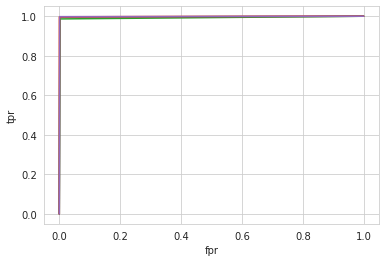

In [ ]:
print(accuracy_score(y_test,a11))
give_me_roc_curve(y_test,a11)

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=10)
clf2 = Perceptron()
clf3 = SVC(C=3)

In [ ]:
clf1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
clf2.fit(x_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
clf3.fit(x_train,y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
a1 = clf1.predict(x_test)

a3 = clf3.predict(x_test)

In [ ]:
a2 = clf2.predict(x_test)


0.9842381786339754
0.9628332360381398
0.9945514691574237


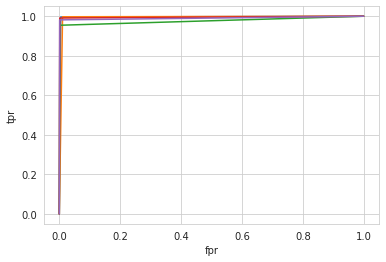

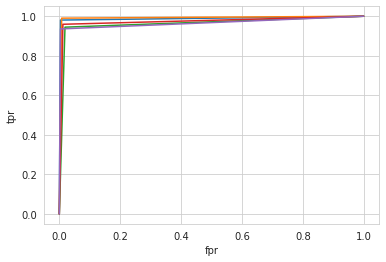

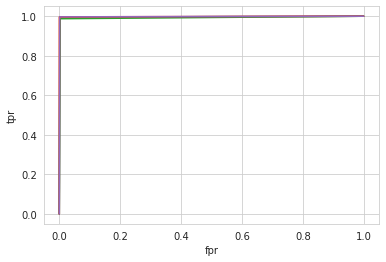

In [ ]:
print(accuracy_score(y_test,a1))
print(accuracy_score(y_test,a2))
print(accuracy_score(y_test,a3))

give_me_roc_curve(y_test,a1)
give_me_roc_curve(y_test,a2)
give_me_roc_curve(y_test,a3)

In [ ]:
x_train.shape

(18596, 784)

In [ ]:
scal = StandardScaler()
x_train = scal.fit_transform(x_train)
x_test = scal.transform(x_test)

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=10)
clf2 = Perceptron()
clf3 = SVC(C=3)

In [ ]:
clf1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
clf2.fit(x_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
clf3.fit(x_train,y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
a1 = clf1.predict(x_test)
a2 = clf2.predict(x_test)
a3 = clf3.predict(x_test)

0.9700330803658299
0.959330609067912
0.9842381786339754


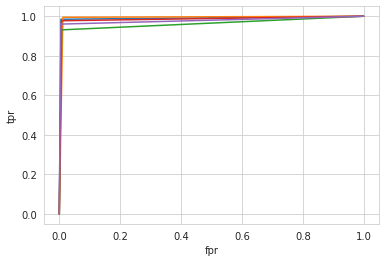

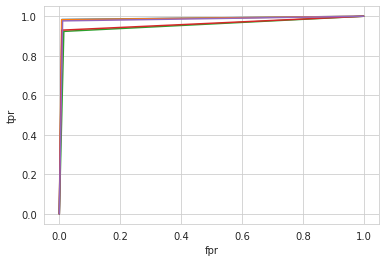

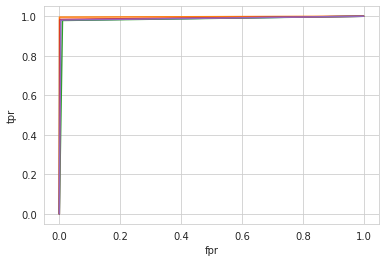

In [ ]:
print(accuracy_score(y_test,a1))
print(accuracy_score(y_test,a2))
print(accuracy_score(y_test,a3))

give_me_roc_curve(y_test,a1)
give_me_roc_curve(y_test,a2)
give_me_roc_curve(y_test,a3)

In [ ]:
onevsrest_clf = SVC(C=3,decision_function_shape='ovr')
onevsrest_clf.fit(x_train,y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

accuracy score :  0.9945514691574237


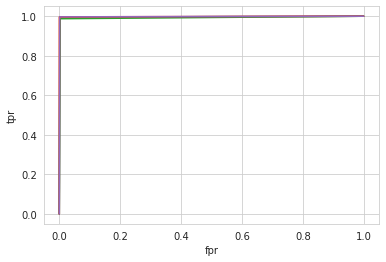

In [ ]:
ovr_a1 = onevsrest_clf.predict(x_test)
print('accuracy score : ',accuracy_score(ovr_a1,y_test))
give_me_roc_curve(y_test,ovr_a1)

In [ ]:
onevsone_clf = SVC(C=3,decision_function_shape='ovo')
onevsone_clf.fit(x_train,y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

accuracy score :  0.9945514691574237


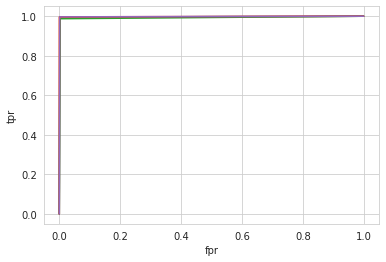

In [ ]:
ovo_a1 = onevsone_clf.predict(x_test)
print('accuracy score : ',accuracy_score(ovo_a1,y_test))
give_me_roc_curve(y_test,ovo_a1)